In [384]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import classification_report
from statsmodels.tools import add_constant as add_constant
import plotly.graph_objects as go

# Problem

Anda adalah seorang dokter yang bekerja di sebuah klinik kesehatan. Anda memiliki data dari beberapa pasien yang mencakup informasi tentang jumlah kehamilan, tingkat glukosa, tekanan darah, ketebalan kulit, kadar insulin, indeks massa tubuh (BMI), fungsi diabetes keluarga, dan usia. Anda diminta untuk memprediksi apakah seorang pasien memiliki kemungkinan menderita diabetes atau tidak berdasarkan data ini.
Untuk itu, Anda memutuskan untuk menggunakan model Logistic Regression untuk memprediksi outcome (1 = memiliki diabetes, 0 = tidak memiliki diabetes). 

# Import

In [389]:
df = pd.read_csv("C:/Users/Owen/Downloads/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# P-value

In [392]:
diabetes_df = add_constant(df)
X = diabetes_df.columns[:-1]
model = sm.Logit(diabetes_df.outcome, diabetes_df[X])
hasil = model.fit()
hasil.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.2718
Time:                        13:14:27   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

Berarti bisa kita simpulkan bahwa yg memiliki Corellation sama Y, itu ada beberapa kolom yaitu, Pregnancies, glucose, BloodPressure,BMI,DiabetesPedigreeFuction, krn P ya dibawah 0.05

# Data Preparation

In [396]:
Numerik = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction','outcome']
df[Numerik].describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,31.992578,0.471876,0.348958
std,3.369578,31.972618,19.355807,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,1.000000


Dari data terlihat sepertinya ada potensi Outlier, dan kita perlu juga scalling nantinya

In [399]:
df[Numerik].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [401]:
df[Numerik].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
outcome                     0
dtype: int64

Terlihat bahwa tidak ada Missing values, maka nantinya tidak perlu melakukin imputasi

# EDA

In [405]:
df1 = df[Numerik]

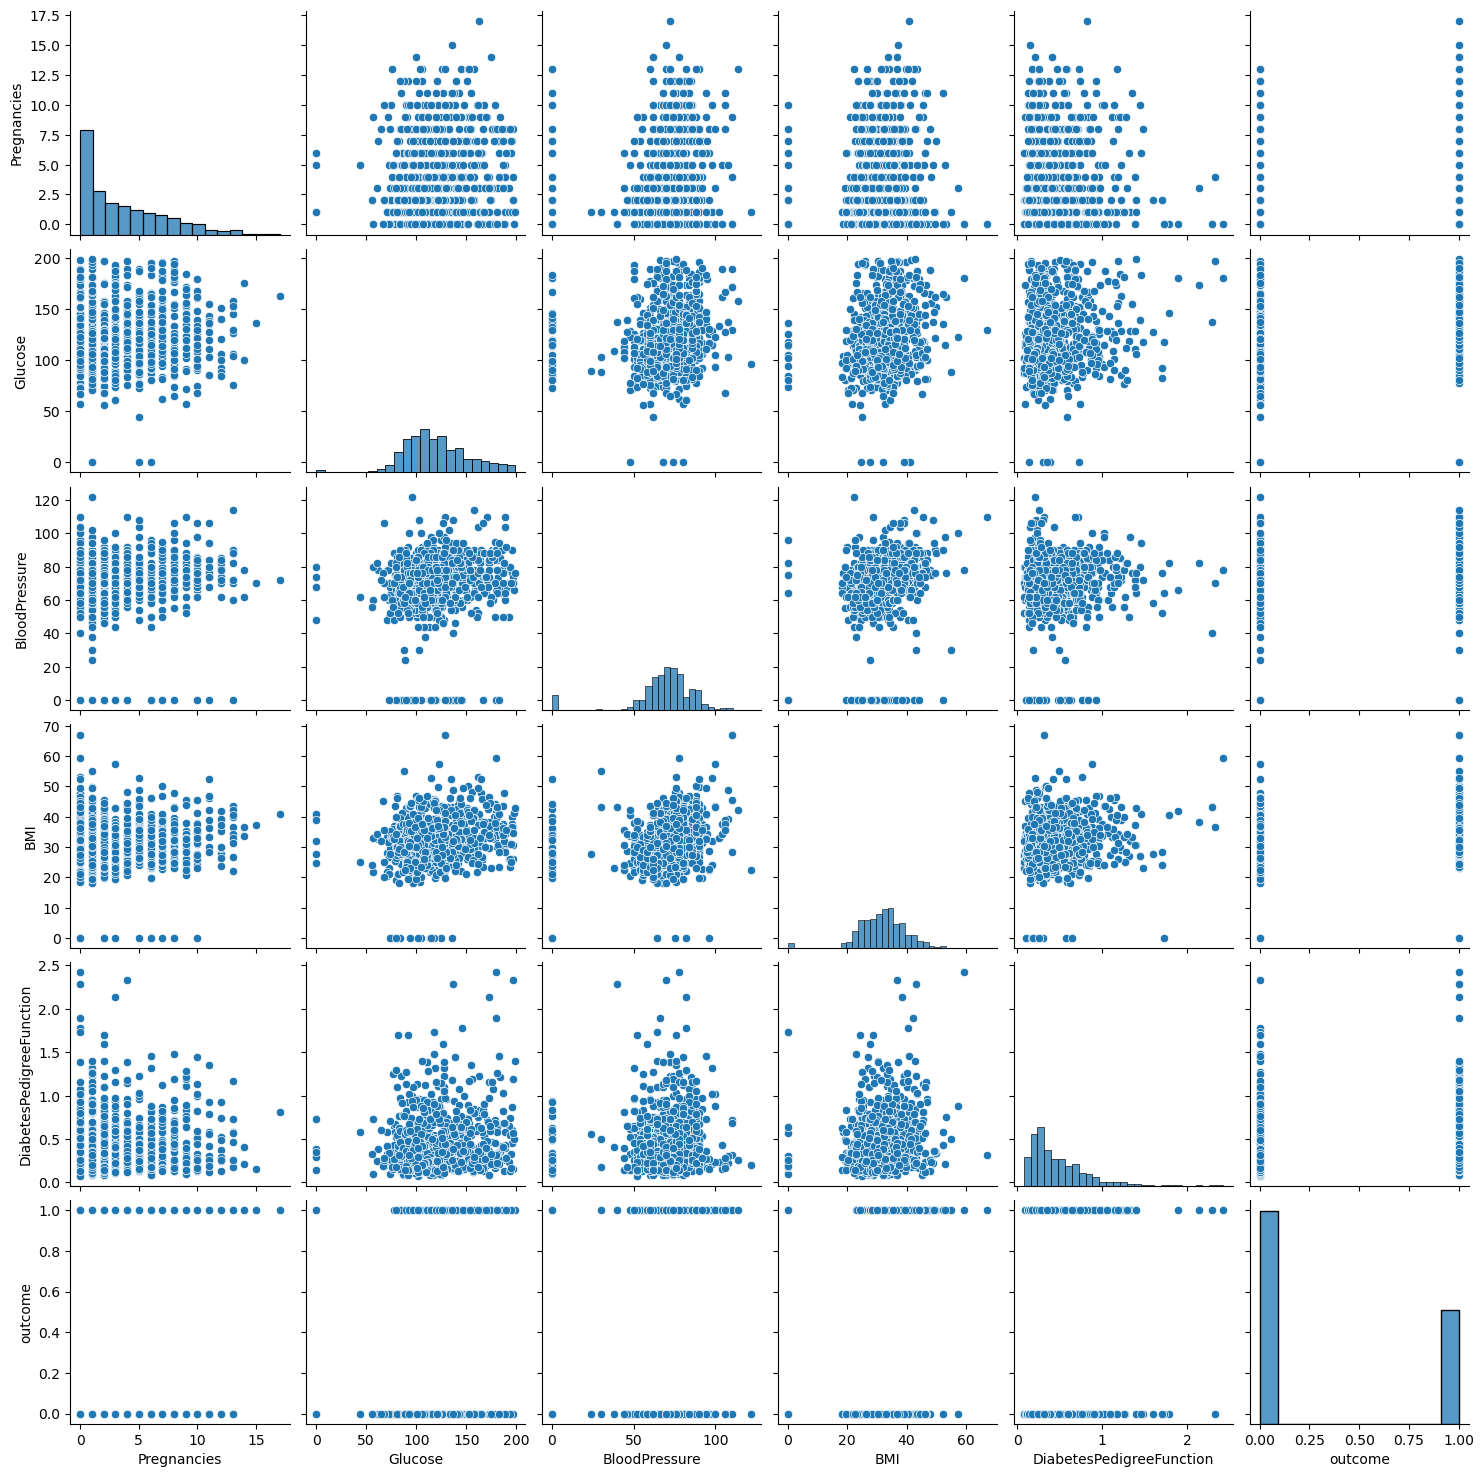

In [407]:
sns.pairplot(df[Numerik])

<Axes: >

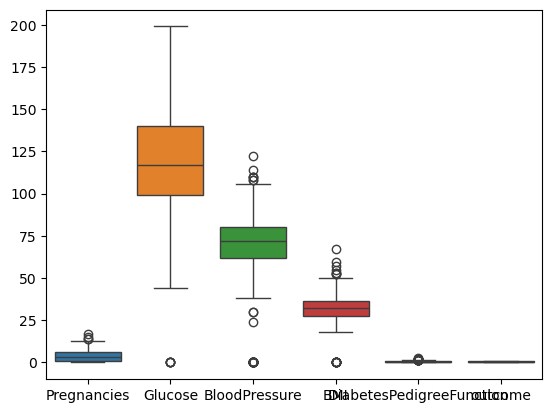

In [408]:
sns.boxplot(df[Numerik])

In [409]:
df1.outcome.value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

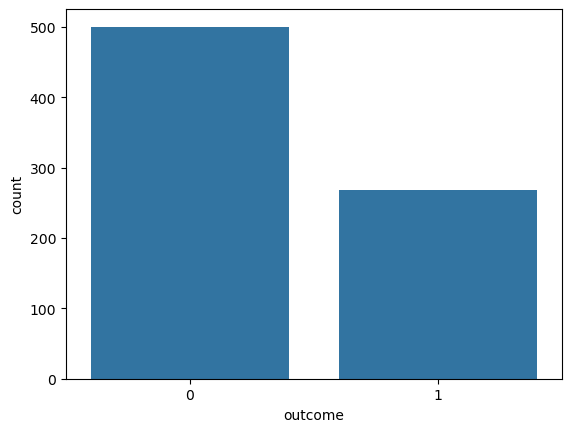

In [410]:
sns.countplot(x = 'outcome', data=df1)

In [411]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'outcome'],
      dtype='object')

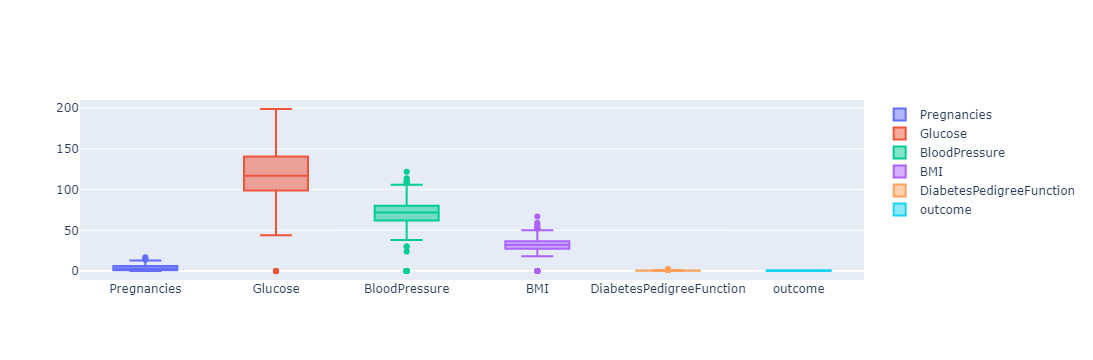

In [412]:
fig = go.Figure()
for col in df1:
    fig.add_trace(go.Box(y=df1[col], name=f'{col}'))
fig.show()

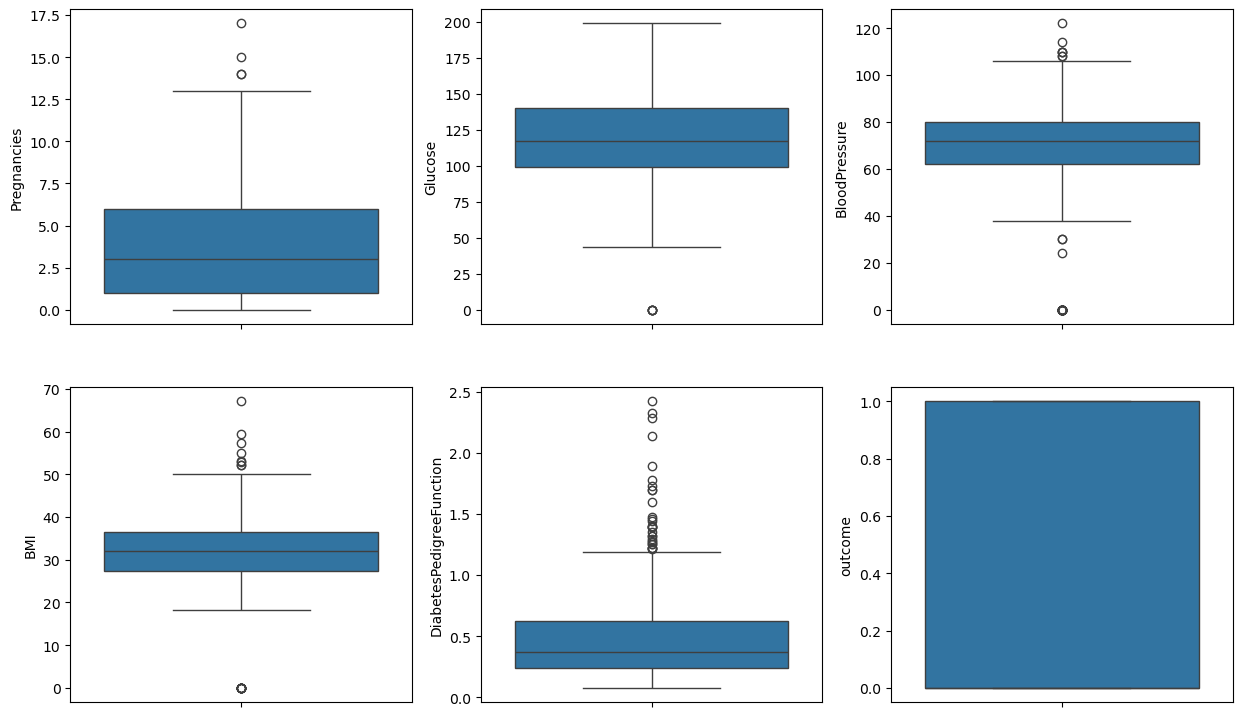

In [413]:
%matplotlib inline
fig, ax = plt.subplots(2,3, figsize=(15,9))

for i,col in enumerate(df1) :
    sns.boxplot(df1[col], ax=ax[i//3, i%3])
plt.show()

Kita bisa melihat bahwa ada beberapa column yg memiliki banyak outlier yg cukup banyak seperti BloodPressure, BMI, DiabetesPedigreeFuction

Kita liat batasan yg ada outlier khusus yg besar doang

In [417]:
IQR_1 = df1.BloodPressure.quantile(0.75) - df1.BloodPressure.quantile(0.25)
Batas_bawah_BloodPressure = df1.BloodPressure.quantile(0.25) - (IQR_1 * 3)
Batas_atas_BloodPressure = df1.BloodPressure.quantile(0.75) + (IQR_1 * 3)

IQR_2 =  df1.BMI.quantile(0.75) - df1.BMI.quantile(0.25)
Batas_bawah_BMI = df1.BMI.quantile(0.25) - (IQR_2 * 3)
Batas_atas_BMI = df1.BMI.quantile(0.75) + (IQR_2 * 3)

IQR_3 =  df1.DiabetesPedigreeFunction.quantile(0.75) - df1.DiabetesPedigreeFunction.quantile(0.25)
Batas_bawah_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.25) - (IQR_3 * 3)
Batas_atas_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.75) + (IQR_3 * 3)

IQR_4 = df1.Pregnancies.quantile(0.75) - df1.Pregnancies.quantile(0.25)
Batas_bawah_Pregnancies = df1.Pregnancies.quantile(0.25) - (IQR_3 * 3)
Batas_atas_Pregnancies = df1.Pregnancies.quantile(0.75) + (IQR_3 * 3)

print('Blood pressure > ', Batas_bawah_BloodPressure, ' or <', Batas_atas_BloodPressure)
print('BMI > ', Batas_bawah_BMI, '> or <', Batas_atas_BMI)
print('Diabetes > ', Batas_bawah_DiabetesPedigreeFunction, ' or <', Batas_atas_DiabetesPedigreeFunction)
print('Pregnancies > ', Batas_bawah_Pregnancies, '> or <', Batas_atas_Pregnancies)

Blood pressure >  8.0  or < 134.0
BMI >  -0.6000000000000014 > or < 64.5
Diabetes >  -0.9037499999999999  or < 1.77375
Pregnancies >  -0.14749999999999996 > or < 7.1475


In [418]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

In [419]:
df1.BloodPressure.max()

122

In [420]:
df1.BloodPressure.min()

0

Mari kita liat distribusi data ya

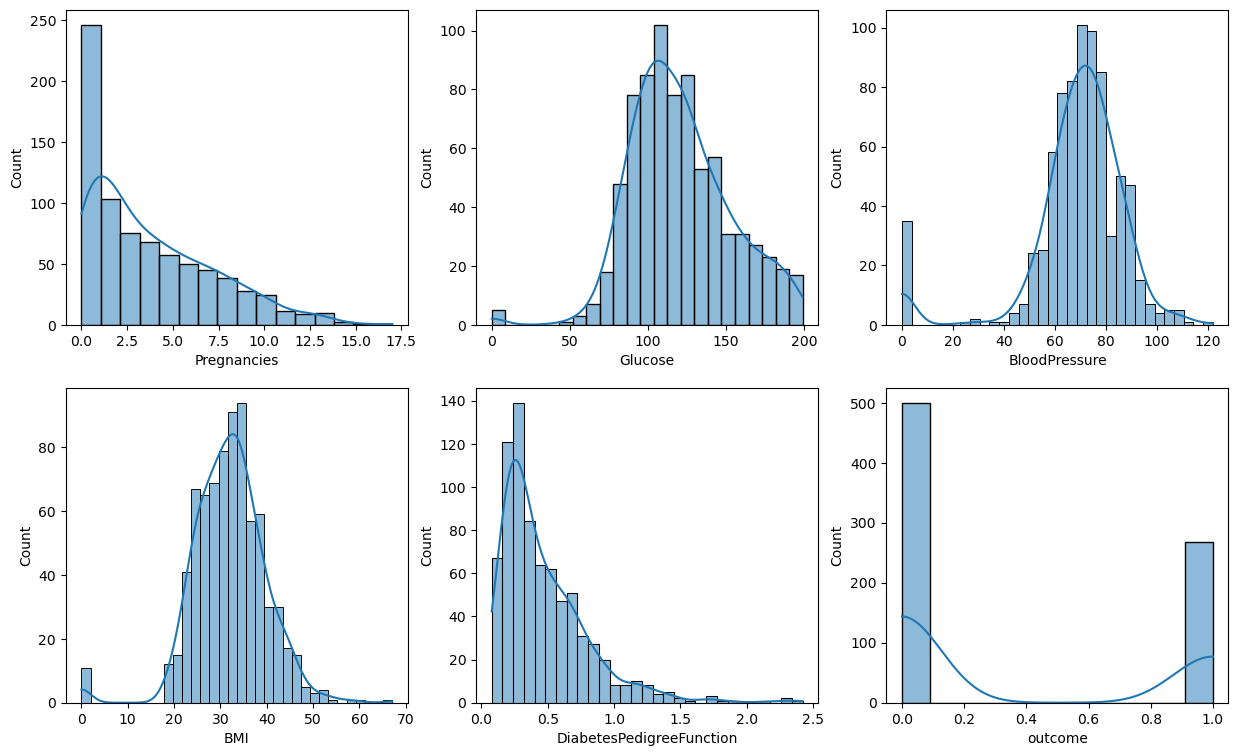

In [422]:
%matplotlib inline

fig, ax = plt.subplots(2,3,figsize=(15,9))
for i, col in enumerate(df1):
    sns.histplot(df1[col], kde=True, ax=ax[i//3, i%3])
plt.show()

Text(0, 0.5, 'outcome')

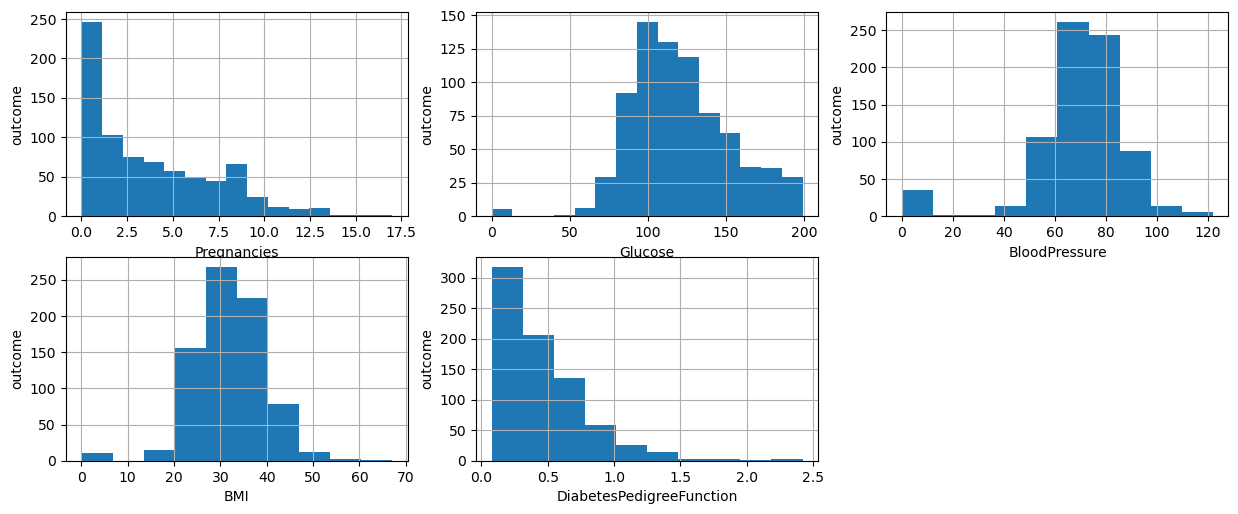

In [423]:
%matplotlib inline
plt.figure(figsize=(15,9))

plt.subplot(3,3,1)
fig = df1.Pregnancies.hist(bins=15)
fig.set_xlabel('Pregnancies')
fig.set_ylabel('outcome')

plt.subplot(3,3,2)
fig = df1.Glucose.hist(bins=15)
fig.set_xlabel('Glucose')
fig.set_ylabel('outcome')

plt.subplot(3,3,3)
fig = df1.BloodPressure.hist(bins=10)
fig.set_xlabel('BloodPressure')
fig.set_ylabel('outcome')

plt.subplot(3,3,4)
fig = df1.BMI.hist(bins=10)
fig.set_xlabel('BMI')
fig.set_ylabel('outcome')

plt.subplot(3,3,5)
fig = df1.DiabetesPedigreeFunction.hist(bins=10)
fig.set_xlabel('DiabetesPedigreeFunction')
fig.set_ylabel('outcome')

terlihat pada distribusi data bahwa sebagian besar adalah skewed

# Splitting Data

In [426]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'outcome'],
      dtype='object')

In [427]:
Feature = df1.drop('outcome',axis=1)
Target = df1.outcome
X_train,X_test,y_train,y_test = train_test_split(Feature, Target, test_size=0.2, random_state=0)

In [428]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 5), (614,), (154, 5), (154,))

#### Saya bikin untuk membatasi outlier ya

In [429]:
def Max(df3, kolom, batas) :
    return np.where(df3[kolom] > batas, batas, df3[kolom])

for df3 in [X_train, X_test] :
    df3['BloodPressure'] = Max(df3, 'BloodPressure', 134)
    df3['BMI'] = Max(df3, 'BMI', 64.5)
    df3['DiabetesPedigreeFunction'] = Max(df3, 'DiabetesPedigreeFunction', 1.77375)
    df3['Pregnancies'] = Max(df3, 'Pregnancies', 7.1475)

# Scalling

In [431]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.420269,120.895765,69.226384,32.202443,0.462879
std,2.614157,31.809725,19.550893,7.896251,0.315833
min,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,27.500000,0.238000
50%,3.000000,117.500000,72.000000,32.400000,0.369000
75%,6.000000,141.000000,80.000000,36.775000,0.606500
max,7.147500,198.000000,122.000000,64.500000,1.773750


In [435]:
Cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = [Cols])
X_test = pd.DataFrame(X_test, columns=[Cols])

In [452]:
X_train

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,0.979363,0.757576,0.639344,0.545736,0.362082
1,0.559636,0.489899,0.491803,0.437209,0.215244
2,0.000000,0.833333,0.737705,0.810853,0.205809
3,0.139909,0.550505,0.459016,0.390698,0.445231
4,1.000000,0.606061,0.000000,0.465116,0.061920
...,...,...,...,...,...
609,1.000000,0.510101,0.622951,0.510078,0.054843
610,0.979363,0.803030,0.540984,0.471318,0.179861
611,0.559636,0.474747,0.532787,0.382946,0.041280
612,1.000000,0.429293,0.606557,0.466667,0.130916


In [454]:
X_test

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,0.139909,1.005051,0.622951,0.665116,0.776058
1,0.279818,0.540404,0.606557,0.520930,0.192245
2,0.559636,0.383838,0.508197,0.527132,0.184579
3,0.699545,0.838384,0.590164,0.400000,0.300162
4,0.000000,0.560606,0.532787,0.381395,0.343211
...,...,...,...,...,...
149,0.279818,0.530303,0.655738,0.522481,0.373286
150,0.559636,0.429293,0.475410,0.431008,0.134454
151,0.559636,0.717172,0.704918,0.682171,0.334365
152,0.419727,0.585859,0.606557,0.407752,0.017102


# Train The Model

In [457]:
Model = LogisticRegression(solver='liblinear', random_state=0)
Model.fit(X_train, y_train)
a = Model.predict(X_test)
a

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [459]:
print('Training = ', Model.score(X_train,y_train))
print('Test =', Model.score(X_test,y_test))

Training =  0.7687296416938111
Test = 0.8311688311688312


In [461]:
y_test_proba = Model.predict(X_test)
y_test_proba

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [463]:
a = Model.predict(X_train)
b = Model.predict(X_test)

print('Train score : ', accuracy_score(y_train, a))
print('Test score : ', accuracy_score(y_test, b))

Train score :  0.7687296416938111
Test score :  0.8311688311688312


# Regulasi

Menggunakan C=100

In [467]:
Model100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
Model100.fit(X_train, y_train)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [469]:
print('Training C100 : ', format(Model100.score(X_train, y_train)))
print('Test C100 : ', format(Model100.score(X_test, y_test)))

Training C100 :  0.762214983713355
Test C100 :  0.8116883116883117


Seperti yg terlihat bahwa ketika kita meningkatkan Hypermater C, maka test naik, maka Dari itu saya memutuskan untuk menggunakan C100

In [472]:
y_test_proba100 = Model100.predict(X_test)
y_test_proba100

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

Menggunakan C=0.01

In [475]:
Model0 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
Model0.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [477]:
print('Training C0.01 : ', format(Model0.score(X_train, y_train)))
print('Test C0.01 : ', format(Model0.score(X_test, y_test)))

Training C0.01 :  0.6400651465798045
Test C0.01 :  0.6948051948051948


#### Bandingkan dengan predict NULL

In [537]:
y_test.value_counts()

outcome
0    107
1     47
Name: count, dtype: int64

In [539]:
null_acuracy = (107/(107+47))
print('null acuracy = ', null_acuracy )

null acuracy =  0.6948051948051948


In [551]:
y_pred = Model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8311688311688312

#### Model kita bagus krn 0.83 > 0.69

# Confussion Matrix

In [480]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_proba100)

print('Confusion Matrix :\n', cm)
print('\nTP :', cm[0,0])
print('TN :', cm[1,1])
print('FP :', cm[0,1])
print('FN :', cm[1,0])

Confusion Matrix :
 [[95 12]
 [17 30]]

TP : 95
TN : 30
FP : 12
FN : 17


In [483]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_proba)

print('Confusion Matrix :\n', cm)
print('\nTP :', cm[0,0])
print('TN :', cm[1,1])
print('FP :', cm[0,1])
print('FN :', cm[1,0])

Confusion Matrix :
 [[100   7]
 [ 19  28]]

TP : 100
TN : 28
FP : 7
FN : 19


<Axes: >

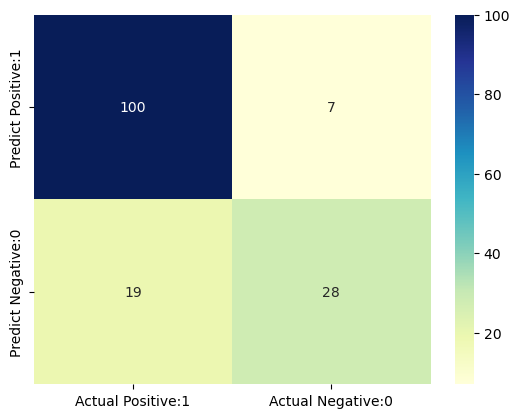

In [485]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# recall dll

In [488]:
print(classification_report(y_test, y_test_proba))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.80      0.60      0.68        47

    accuracy                           0.83       154
   macro avg       0.82      0.77      0.78       154
weighted avg       0.83      0.83      0.82       154



In [490]:
print(classification_report(y_test, y_test_proba100))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



# AUC

In [493]:
y_pred_prob100=Model100.predict_proba(X_test)[:,:]

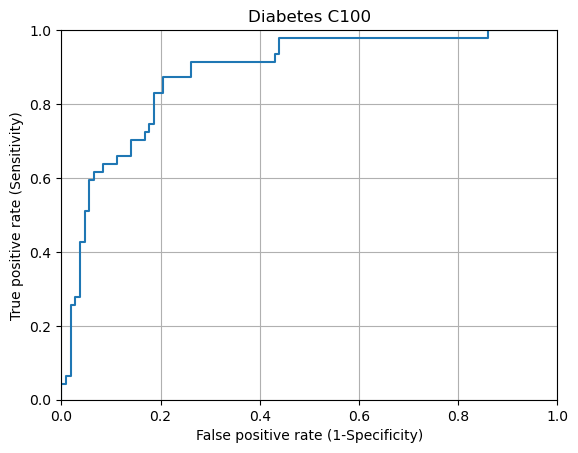

In [555]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob100[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Diabetes C100')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [557]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred_prob100[:,1])

0.8804931397892225

In [499]:
y_pred_prob=Model.predict_proba(X_test)[:,:]

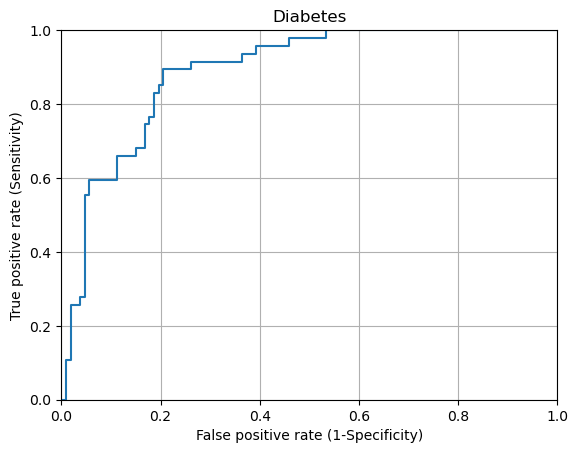

In [559]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Diabetes')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [502]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred_prob[:,1])

0.887651620600517

In [505]:
Model.predict_proba(X_test)[:,0]

array([0.16742749, 0.7493054 , 0.79773845, 0.43002673, 0.79332266,
       0.88653405, 0.32672213, 0.31334743, 0.49920518, 0.64228992,
       0.43935184, 0.1643352 , 0.66832662, 0.67908025, 0.77507115,
       0.77639188, 0.24248789, 0.89967616, 0.65852396, 0.65910796,
       0.47614648, 0.59557082, 0.69493945, 0.88440091, 0.84294546,
       0.64701181, 0.86490507, 0.25242429, 0.78832628, 0.7288637 ,
       0.51218915, 0.73653108, 0.81710629, 0.56174177, 0.79641269,
       0.41265099, 0.5701187 , 0.80202425, 0.67723144, 0.38073778,
       0.67931447, 0.71225789, 0.70180125, 0.32950603, 0.38863407,
       0.92962519, 0.81347241, 0.7000413 , 0.58948235, 0.62477803,
       0.56718216, 0.72984681, 0.27851175, 0.52603576, 0.79927001,
       0.97441681, 0.86789045, 0.54614573, 0.64759991, 0.7449929 ,
       0.39162452, 0.50635853, 0.80002119, 0.41631141, 0.41016002,
       0.17660483, 0.40877891, 0.76932248, 0.60648763, 0.79780062,
       0.77909822, 0.52613665, 0.84923465, 0.15499838, 0.29828

In [507]:
Model.predict_proba(X_test)[:,1]

array([0.83257251, 0.2506946 , 0.20226155, 0.56997327, 0.20667734,
       0.11346595, 0.67327787, 0.68665257, 0.50079482, 0.35771008,
       0.56064816, 0.8356648 , 0.33167338, 0.32091975, 0.22492885,
       0.22360812, 0.75751211, 0.10032384, 0.34147604, 0.34089204,
       0.52385352, 0.40442918, 0.30506055, 0.11559909, 0.15705454,
       0.35298819, 0.13509493, 0.74757571, 0.21167372, 0.2711363 ,
       0.48781085, 0.26346892, 0.18289371, 0.43825823, 0.20358731,
       0.58734901, 0.4298813 , 0.19797575, 0.32276856, 0.61926222,
       0.32068553, 0.28774211, 0.29819875, 0.67049397, 0.61136593,
       0.07037481, 0.18652759, 0.2999587 , 0.41051765, 0.37522197,
       0.43281784, 0.27015319, 0.72148825, 0.47396424, 0.20072999,
       0.02558319, 0.13210955, 0.45385427, 0.35240009, 0.2550071 ,
       0.60837548, 0.49364147, 0.19997881, 0.58368859, 0.58983998,
       0.82339517, 0.59122109, 0.23067752, 0.39351237, 0.20219938,
       0.22090178, 0.47386335, 0.15076535, 0.84500162, 0.70171

In [509]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7398374  0.77235772 0.82113821 0.69918699 0.77868852]


In [511]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7622


In [513]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Model100, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.73170732 0.7804878  0.75609756 0.72357724 0.78688525]


In [515]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7558


In [517]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = Model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [519]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7622


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [521]:
Model1000 = LogisticRegression

In [523]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = Model100,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=100, random_state=0,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [525]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7622


Parameters that give the best results : 

 {'C': 1}


Estimator that was chosen by the search : 

 LogisticRegression(C=1, random_state=0, solver='liblinear')


In [527]:
Model1 = LogisticRegression(C=1, random_state = 0, solver='liblinear')
Model1.fit(X_train, y_train)
Model1.score(X_train, y_train), Model1.score(X_test, y_test)

(0.7687296416938111, 0.8311688311688312)

In [529]:
Model10 = LogisticRegression(C=10, random_state=0, solver='liblinear')
Model10.fit(X_train, y_train)
Model10.predict(X_train)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [531]:
Model10.score(X_train,y_train)

0.7638436482084691

In [533]:
Model10.score(X_test, y_test)

0.8181818181818182